In [1]:
#Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/Nicolasd0/Kaggle-Competition1/main/jfreechart-test-stats.csv")

In [3]:
df

,class,TLOC,WMC,TASSERT
0,./src/test/java/org/jfree/chart/annotations/Ca...,107,8,27
1,./src/test/java/org/jfree/chart/annotations/Ca...,96,8,30
2,./src/test/java/org/jfree/chart/annotations/Ca...,61,8,14
3,./src/test/java/org/jfree/chart/annotations/Te...,92,12,22
4,./src/test/java/org/jfree/chart/annotations/XY...,141,8,21
...,...,...,...,...
346,./src/test/java/org/jfree/data/xy/YIntervalDat...,53,10,18
347,./src/test/java/org/jfree/data/xy/YIntervalSer...,90,11,13
348,./src/test/java/org/jfree/data/xy/YIntervalSer...,158,13,47
349,./src/test/java/org/jfree/data/xy/YIntervalTes...,35,8,9


In [17]:
df = df.rename(columns={" WMC": "WMC", " TASSERT": "TASSERT"})

Text(0.5, 1.0, 'Boîte à moustache de la métrique TLOC')

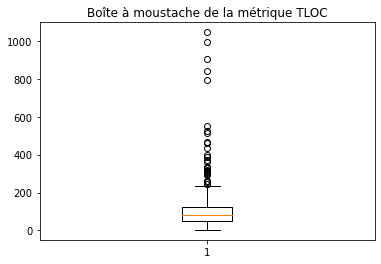

In [5]:
plt.boxplot(df['TLOC'])
plt.title('Boîte à moustache de la métrique TLOC')

Text(0.5, 1.0, 'Boîte à moustache de la métrique WMC')

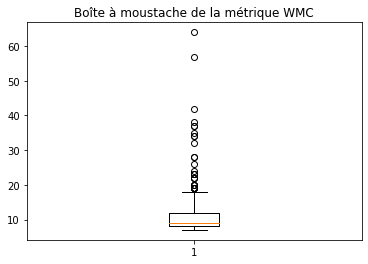

In [6]:
plt.boxplot(df['WMC'])
plt.title('Boîte à moustache de la métrique WMC')

Text(0.5, 1.0, 'Boîte à moustache de la métrique TASSERT')

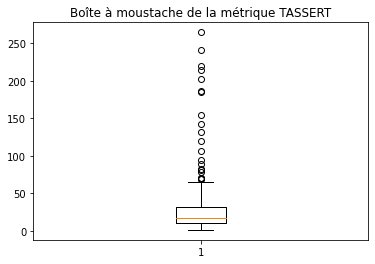

In [7]:
plt.boxplot(df['TASSERT'])
plt.title('Boîte à moustache de la métrique TASSERT')

In [18]:
print(df.size)
median_tloc = df['TLOC'].median()
median_wmc = df['WMC'].median()
median_tassert = df['TASSERT'].median()

#U
upper_median_tloc = df[df['TLOC'] > median_tloc]['TLOC'].median()
upper_median_wmc = df[df['WMC'] > median_wmc]['WMC'].median()
upper_median_tassert = df[df['TASSERT'] > median_tassert]['TASSERT'].median()

#I
lower_median_tloc = df[df['TLOC'] < median_tloc]['TLOC'].median()
lower_median_wmc = df[df['WMC'] < median_wmc]['WMC'].median()
lower_median_tassert = df[df['TASSERT'] < median_tassert]['TASSERT'].median()

#1.5d
range_tloc = 1.5 * (upper_median_tloc - lower_median_tloc)
range_wmc = 1.5 * (upper_median_wmc - lower_median_wmc)
range_tassert = 1.5 * (upper_median_tassert - lower_median_tassert)

#Filter TLOC columns
df = df[(df['TLOC'] < upper_median_tloc + range_tloc) & (df['TLOC'] > lower_median_tloc - range_tloc)]

#Filter WMC columns
df = df[(df['WMC'] < upper_median_wmc + range_wmc) & (df['WMC'] > lower_median_wmc - range_wmc)]

#Filter TASSERT columns
df = df[(df['TASSERT'] < upper_median_tassert + range_tassert) & (df['TASSERT'] > lower_median_tassert - range_tassert)]

print(df.size)

1404
1220


Text(0.5, 1.0, 'Distribution de la métrique TLOC')

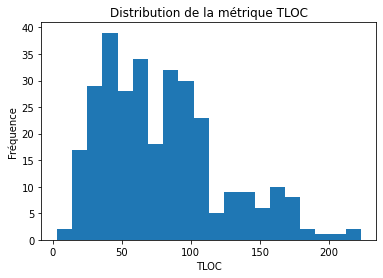

In [9]:
#Distribution TLOC
plt.hist(df['TLOC'], bins=20)
plt.xlabel('TLOC')
plt.ylabel('Fréquence')
plt.title('Distribution de la métrique TLOC')

Text(0.5, 1.0, 'Distribution de la métrique WMC')

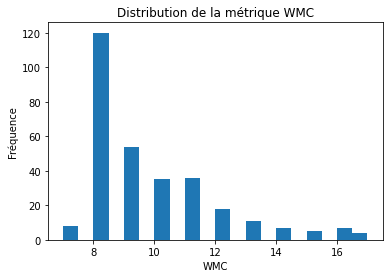

In [15]:
#Distribution WMC
plt.hist(df['WMC'], bins=20)
plt.xlabel('WMC')
plt.ylabel('Fréquence')
plt.title('Distribution de la métrique WMC')

Text(0.5, 1.0, 'Distribution de la métrique TASSERT')

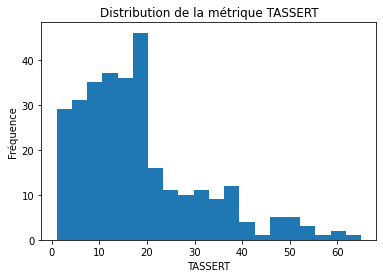

In [11]:
#Distribution TASSERT
plt.hist(df['TASSERT'], bins=20)
plt.xlabel('TASSERT')
plt.ylabel('Fréquence')
plt.title('Distribution de la métrique TASSERT')

Corrélation entre TLOC et TASSERT: 0.7668497586390084


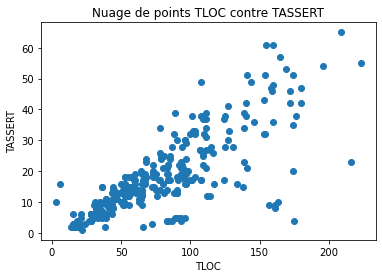

In [12]:
#Corrélation TLOC et WMC
plt.scatter(x=df['TLOC'], y=df['TASSERT'])

plt.xlabel('TLOC')
plt.ylabel('TASSERT')
plt.title('Nuage de points TLOC contre TASSERT')

corr = df['TLOC'].corr(df['TASSERT'], method="spearman")

print("Corrélation entre TLOC et TASSERT: " + str(corr))

Corrélation entre TLOC et TASSERT: 0.4551658388367608


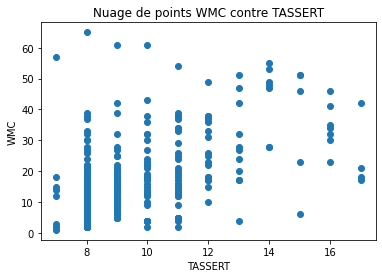

In [13]:
#Corrélation WMC et TASSERT
plt.scatter(x=df['WMC'], y=df['TASSERT'])

plt.xlabel('TASSERT')
plt.ylabel('WMC')
plt.title('Nuage de points WMC contre TASSERT')

corr = df['WMC'].corr(df['TASSERT'], method="spearman")

print("Corrélation entre TLOC et TASSERT: " + str(corr))






In [19]:
# Régression linéaire TLOC vs TASSERT
model_TLOC_TASSERT = LinearRegression()
X_TLOC = df[['TLOC']]
y_TASSERT = df['TASSERT']
model_TLOC_TASSERT.fit(X_TLOC, y_TASSERT)
coefficient_TLOC_TASSERT = model_TLOC_TASSERT.coef_[0]
intercept_TLOC_TASSERT = model_TLOC_TASSERT.intercept_

# Régression linéaire WMC vs TASSERT
model_WMC_TASSERT = LinearRegression()
X_WMC = df[['WMC']]
y_TASSERT = df['TASSERT']
model_WMC_TASSERT.fit(X_WMC, y_TASSERT)
coefficient_WMC_TASSERT = model_WMC_TASSERT.coef_[0]
intercept_WMC_TASSERT = model_WMC_TASSERT.intercept_

print("Droite de régression TLOC TASSERT: " + str(coefficient_TLOC_TASSERT) + 'x' + ' + ' + str(intercept_TLOC_TASSERT))
print("Droite de régression WMC TASSERT: " + str(coefficient_WMC_TASSERT) + 'x' + ' - ' + str(abs(intercept_WMC_TASSERT)))

Droite de régression TLOC TASSERT: 0.22770512512088292x + 0.16834273966347624
Droite de régression WMC TASSERT: 2.778604692617928x - 8.871048820160876


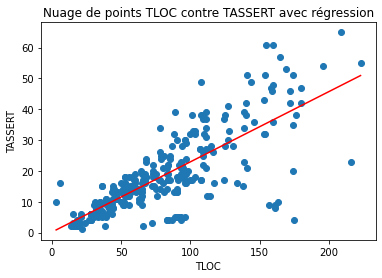

In [24]:
#Corrélation entre TLOC et TASSERT
plt.scatter(x=df['TLOC'], y=df['TASSERT'])

plt.xlabel('TLOC')
plt.ylabel('TASSERT')
plt.title('Nuage de points TLOC contre TASSERT avec régression')

x_values = np.linspace(df['TLOC'].min(), df['TLOC'].max(), 100)
y_values = intercept_TLOC_TASSERT + coefficient_TLOC_TASSERT * x_values
plt.plot(x_values, y_values, color='red', label='Regression Line')

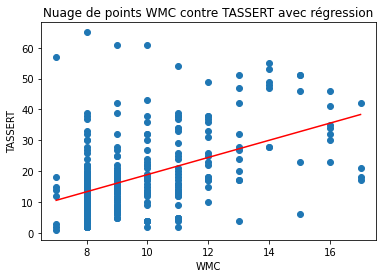

In [23]:
#Corrélation entre WMC et TASSERT
plt.scatter(x=df['WMC'], y=df['TASSERT'])

plt.xlabel('WMC')
plt.ylabel('TASSERT')
plt.title('Nuage de points WMC contre TASSERT avec régression')

x_values = np.linspace(df['WMC'].min(), df['WMC'].max(), 100)
y_values = intercept_WMC_TASSERT + coefficient_WMC_TASSERT * x_values
plt.plot(x_values, y_values, color='red', label='Regression Line')